In [10]:
import pandas as pd

# Ruta al archivo de datos
file_path = 'prueba tolu.txt'

# Leer el archivo saltando la primera línea y tomando la segunda y tercera como nombres de columnas
df_o = pd.read_csv(file_path, delimiter='\t', skiprows=1, header=1)

In [15]:
import pandas as pd

names = ['Fecha','RadAlb',
 'RadRef',
 'RadSolar1',
 'Temperature_HV',
 'RadSolar2',
 'Humidity_HV',
 'lluvia_total',
 'Direccion_Viento',
 'Albedo',
 'Pressure',
 'Velocidad_Viento']

# Read the file at file_path starting from position 2 and assign the columns using names
df_o = pd.read_csv(file_path, delimiter='\t', skiprows=1, header=1, names=names)

In [17]:
df_o.head(3)

,Fecha,RadAlb,RadRef,RadSolar1,Temperature_HV,RadSolar2,Humidity_HV,lluvia_total,Direccion_Viento,Albedo,Pressure,Velocidad_Viento
0,2023-11-04 00:00:00,-0.254,-0.105,-0.102,25.692,0.034,91.594,324.9,66,-0.149,1001.268,1.0
1,2023-11-04 00:01:00,-0.214,-0.081,-0.045,25.688,0.181,91.707,324.9,61,-0.133,1001.274,1.0
2,2023-11-04 00:02:00,-0.239,-0.133,-0.118,25.675,0.139,91.596,324.9,63,-0.106,1001.267,1.0


In [18]:
df = df_o[df_o['Direccion_Viento'] != 0]

In [22]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

# Supongamos que los datos ya están cargados en un DataFrame llamado df

# Definir las columnas de características (features) y la columna objetivo (target)
features_columns = [
    'RadAlb', 'RadRef', 'RadSolar1', 'Temperature_HV', 
    'RadSolar2', 'Humidity_HV', 'lluvia_total', 'Albedo', 
    'Pressure', 'Velocidad_Viento'
]
target_column = 'Direccion_Viento'

# Preparar las características (X) y el objetivo (y)
X = df[features_columns]
y = df[target_column]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros de búsqueda para el GridSearch
param_grid = {
    'max_depth': [7],
    'learning_rate': [0.3],
    'n_estimators': [300],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0.3],
    'reg_alpha': [1],
    'reg_lambda': [2]
}

# Crear el modelo de XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Crear el objeto de validación cruzada KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Crear el GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=param_grid, 
    scoring='neg_mean_squared_error',  # Evaluar usando el error cuadrático medio
    cv=kfold, 
    verbose=1,
    n_jobs=1
)

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Hacer predicciones con los mejores parámetros encontrados
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE del mejor modelo: {rmse}')


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\Jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

Mejores parámetros: {'colsample_bytree': 1.0, 'gamma': 0.3, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 1, 'reg_lambda': 2, 'subsample': 1.0}
RMSE del mejor modelo: 62.3020459799704


C:\Users\Jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [20]:
!python -c "import platform; print(platform.architecture())"

('64bit', 'WindowsPE')


In [23]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE del mejor modelo: {rmse}')

RMSE del mejor modelo: 62.3020459799704


In [ ]:
df_filtered

In [19]:
len(names)

11

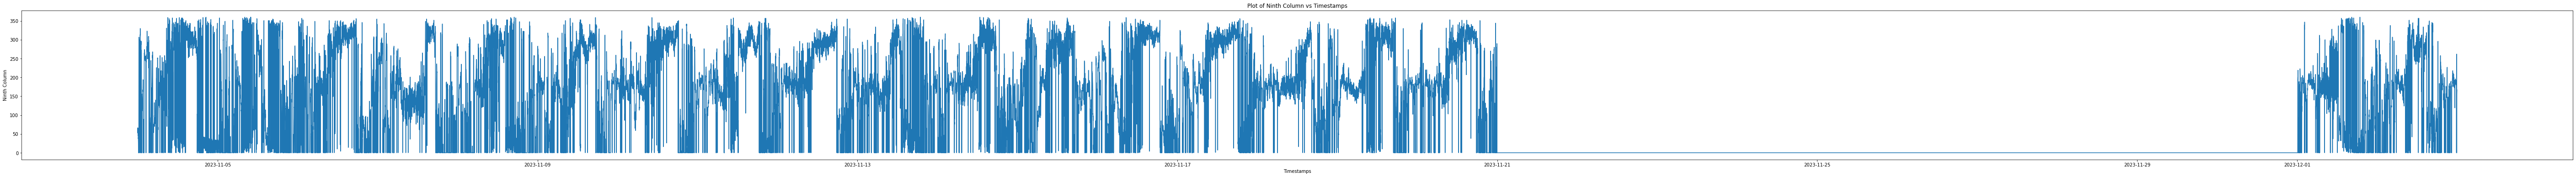

In [15]:
import matplotlib.pyplot as plt

# Convert the first column to timestamps
import matplotlib.pyplot as plt

# Convert the first column to timestamps
df['timestamps'] = pd.to_datetime(df.iloc[:, 0])

# Parametrize the size of the graph
fig = plt.figure(figsize=(100, 6))

# Plot the ninth column against the timestamps
plt.plot(df['timestamps'], df.iloc[:, 8])
plt.xlabel('Timestamps')
plt.ylabel('Ninth Column')
plt.title('Plot of Ninth Column vs Timestamps')
plt.show()

